In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/research/datasets/central_bank_india.csv")
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2024-04-04,66.39,67.00,64.14,64.94,"2,544,505"
1,1,2024-04-03,63.33,65.89,62.80,65.62,"1,690,023"
2,2,2024-04-02,63.35,64.20,62.10,63.19,"1,871,660"
3,3,2024-04-01,60.51,63.85,60.48,63.43,"1,565,080"
4,4,2024-03-28,57.67,61.65,57.67,59.78,"3,000,674"
...,...,...,...,...,...,...,...
2459,2463,2014-04-11,51.15,51.70,50.50,51.15,"138,072"
2460,2464,2014-04-10,52.00,52.80,50.70,51.20,"452,400"
2461,2465,2014-04-09,50.70,52.20,50.40,51.90,"229,396"
2462,2466,2014-04-07,50.30,53.50,49.65,50.55,"57,447"


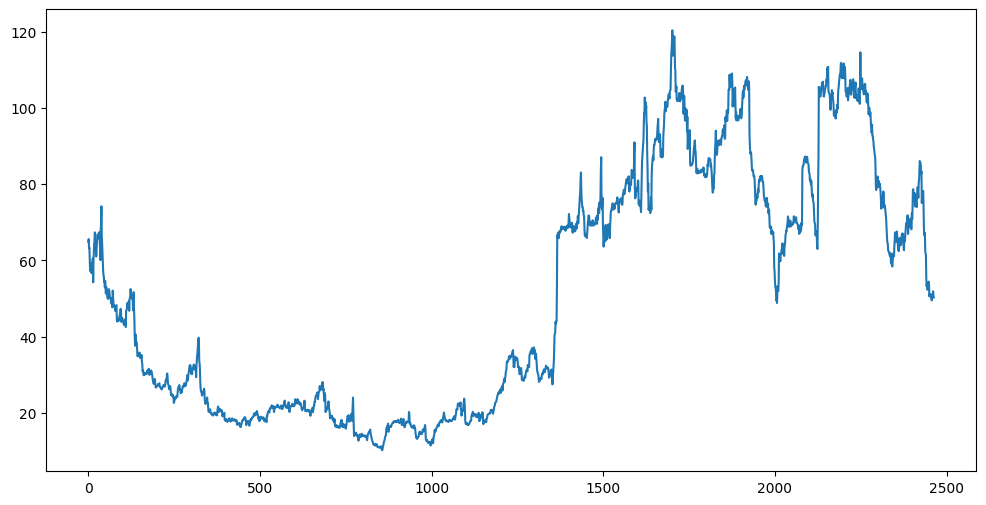

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')

In [ ]:
# Calculate Technical Indicators
def calculate_technical_indicators(data):
    # Moving Averages
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()

    # Relative Strength Index (RSI)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Moving Average Convergence Divergence (MACD)
    data['EMA12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data.dropna(inplace=True)
    return data

data = calculate_technical_indicators(data)

In [ ]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,MA5,MA20,RSI,EMA12,EMA26,MACD
19,19,2024-03-05,62.80,67.95,62.33,67.37,"3,222,510",63.874,60.7815,68.181818,62.055782,61.932078,0.123703
20,20,2024-03-04,63.81,64.18,62.41,62.93,"977,841",64.406,60.6810,57.418112,62.190277,62.005998,0.184278
21,21,2024-03-01,63.01,63.95,62.75,63.28,"1,299,897",64.624,60.5640,56.581532,62.357926,62.100369,0.257558
22,22,2024-02-29,60.51,63.05,60.22,62.68,"1,786,668",64.286,60.5385,58.142665,62.407476,62.143304,0.264172
23,23,2024-02-28,63.89,63.89,60.36,61.05,"2,239,369",63.462,60.4195,57.199603,62.198634,62.062319,0.136315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2463,2014-04-11,51.15,51.70,50.50,51.15,"138,072",50.580,52.5325,44.186047,51.843798,56.429297,-4.585499
2460,2464,2014-04-10,52.00,52.80,50.70,51.20,"452,400",50.610,52.0325,35.483871,51.744752,56.041941,-4.297190
2461,2465,2014-04-09,50.70,52.20,50.40,51.90,"229,396",50.960,51.8550,40.000000,51.768636,55.735131,-3.966495
2462,2466,2014-04-07,50.30,53.50,49.65,50.55,"57,447",51.160,51.7200,31.944444,51.581154,55.351047,-3.769893


In [ ]:
data.isna().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
MA5           0
MA20          0
RSI           0
EMA12         0
EMA26         0
MACD          0
dtype: int64

In [ ]:
# # Additional Market Dynamics Attributes
# data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day Moving Average
# data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day Moving Average
# data['MACD'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean() - data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # Moving Average Convergence Divergence (MACD)

# # Feature Engineering
data['HighMinusLow'] = data['High'] - data['Low']
data['OpenMinusClose'] = data['Open'] - data['Close']

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,MA5,MA20,RSI,EMA12,EMA26,MACD,HighMinusLow,OpenMinusClose
19,19,2024-03-05,62.80,67.95,62.33,67.37,"3,222,510",63.874,60.7815,68.181818,62.055782,61.932078,0.123703,5.62,-4.57
20,20,2024-03-04,63.81,64.18,62.41,62.93,"977,841",64.406,60.6810,57.418112,62.190277,62.005998,0.184278,1.77,0.88
21,21,2024-03-01,63.01,63.95,62.75,63.28,"1,299,897",64.624,60.5640,56.581532,62.357926,62.100369,0.257558,1.20,-0.27
22,22,2024-02-29,60.51,63.05,60.22,62.68,"1,786,668",64.286,60.5385,58.142665,62.407476,62.143304,0.264172,2.83,-2.17
23,23,2024-02-28,63.89,63.89,60.36,61.05,"2,239,369",63.462,60.4195,57.199603,62.198634,62.062319,0.136315,3.53,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2463,2014-04-11,51.15,51.70,50.50,51.15,"138,072",50.580,52.5325,44.186047,51.843798,56.429297,-4.585499,1.20,0.00
2460,2464,2014-04-10,52.00,52.80,50.70,51.20,"452,400",50.610,52.0325,35.483871,51.744752,56.041941,-4.297190,2.10,0.80
2461,2465,2014-04-09,50.70,52.20,50.40,51.90,"229,396",50.960,51.8550,40.000000,51.768636,55.735131,-3.966495,1.80,-1.20
2462,2466,2014-04-07,50.30,53.50,49.65,50.55,"57,447",51.160,51.7200,31.944444,51.581154,55.351047,-3.769893,3.85,-0.25


In [ ]:
# Classification Criteria
def classify_buy_sell(data):
    data['Buy/Sell'] = np.where((data['Close'] > data['MA5']) &
                                 (data['Close'] > data['MA20']) &
                                 (data['RSI'] > 50) &
                                 (data['MACD'] > 0), 1, -1)
    return data

In [ ]:
data = classify_buy_sell(data)

In [ ]:
X_cls = data[['MA5', 'MA20','RSI','EMA12','EMA26' ,'MACD']]
# y_cls = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
y_cls = data['Buy/Sell']

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.25, random_state=44)

In [ ]:
# Feature Scaling for classification
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_best = DecisionTreeClassifier(criterion= 'gini', max_depth=5, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5)
dt_best.fit(X_train_cls_scaled, y_train_cls)

y_pred = dt_best.predict(X_test_cls_scaled)

accuracy = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred)
recall = recall_score(y_test_cls, y_pred)
f1 = f1_score(y_test_cls, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Accuracy: 0.8725490196078431
Precision: 0.6986301369863014
Recall: 0.9272727272727272
F1 Score: 0.796875


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_reg = data[['MA5', 'MA20','RSI','EMA12','EMA26' ,'MACD']]
y_reg = data['Close']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=44)

In [ ]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [ ]:
X_train_reg

,MA5,MA20,RSI,EMA12,EMA26,MACD
2139,105.89,91.1825,89.712389,100.880764,92.650683,8.230082
1708,116.29,110.9425,69.407895,114.498212,109.555191,4.943021
820,14.99,14.1590,69.503546,14.544404,14.394767,0.149637
2412,74.70,73.5275,64.578834,74.689235,72.945729,1.743506
746,16.47,16.6650,50.303030,16.619113,17.000715,-0.381602
...,...,...,...,...,...,...
103,44.03,44.8325,43.702081,44.579236,45.727423,-1.148187
2163,101.99,105.2850,41.610738,103.666327,102.733172,0.933155
590,21.26,21.7800,53.125000,21.557770,21.612416,-0.054646
1216,29.21,27.2250,78.918919,28.332905,26.734365,1.598540


In [ ]:
dt_reg = DecisionTreeRegressor(max_depth= 2,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 2, random_state=44)
dt_reg.fit(X_train_reg_scaled, y_train_reg)

predictions = dt_reg.predict(X_test_reg_scaled)

r2 = r2_score(y_test_reg, predictions)
rmse = mean_squared_error(y_test_reg, predictions, squared=False)
mae = mean_absolute_error(y_test_reg, predictions)
mse = mean_squared_error(y_test_reg, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"Decision Tree R^2: {r2}")
print(f"Decision Tree RMSE: {rmse}")

MAE: 5.338573263733522
MSE: 46.94408458776159
Decision Tree R^2: 0.9525821341892731
Decision Tree RMSE: 6.85157533621003


In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close Value':predictions})
valid

,Actual Close,Predicted Close Value
2222,103.50,104.208333
938,17.38,17.642500
2204,110.80,108.858333
2105,79.95,78.722222
1496,73.40,76.728571
...,...,...
1320,28.95,27.607500
1027,18.10,17.220000
2453,50.60,49.802500
500,18.50,19.013636


In [ ]:
valid_sorted = valid.sort_index()
valid_sorted

,Actual Close,Predicted Close Value
26,65.79,66.664000
32,67.44,66.345000
39,66.54,70.705000
48,52.96,54.410000
51,51.32,52.653333
...,...,...
2442,53.25,62.008333
2443,53.80,54.410000
2450,50.60,53.600000
2453,50.60,49.802500


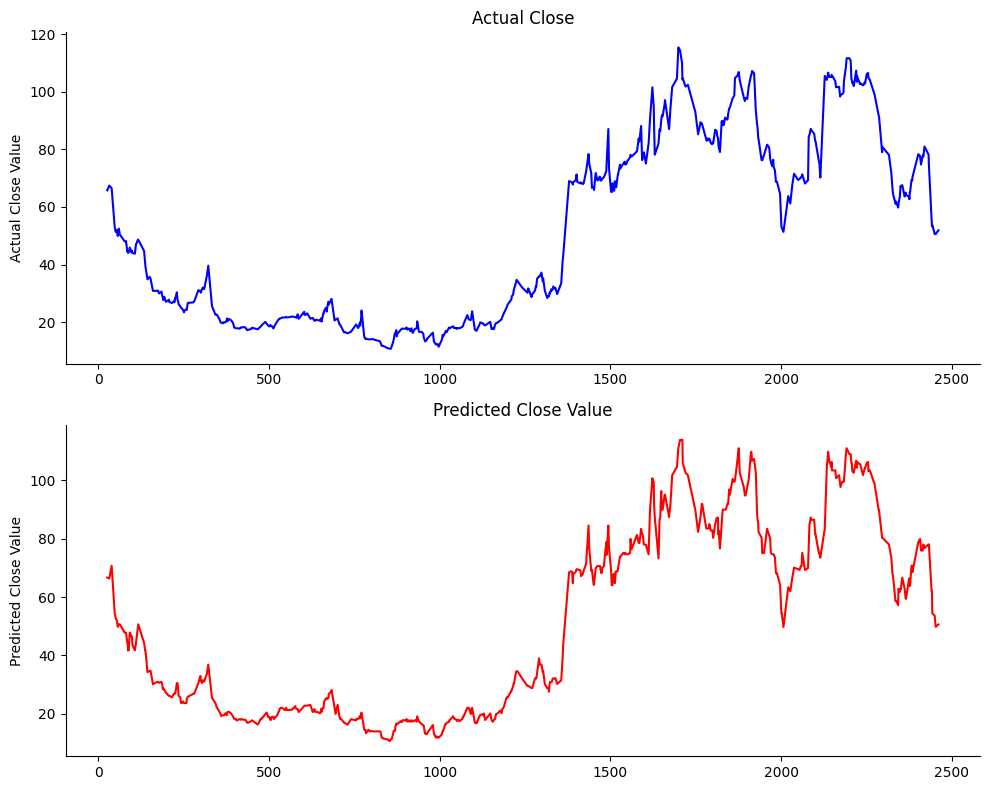

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

valid_sorted['Actual Close'].plot(ax=ax1, kind='line', title='Actual Close', color='blue')
ax1.set_ylabel('Actual Close Value')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

valid_sorted['Predicted Close Value'].plot(ax=ax2, kind='line', title='Predicted Close Value', color='red')
ax2.set_ylabel('Predicted Close Value')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

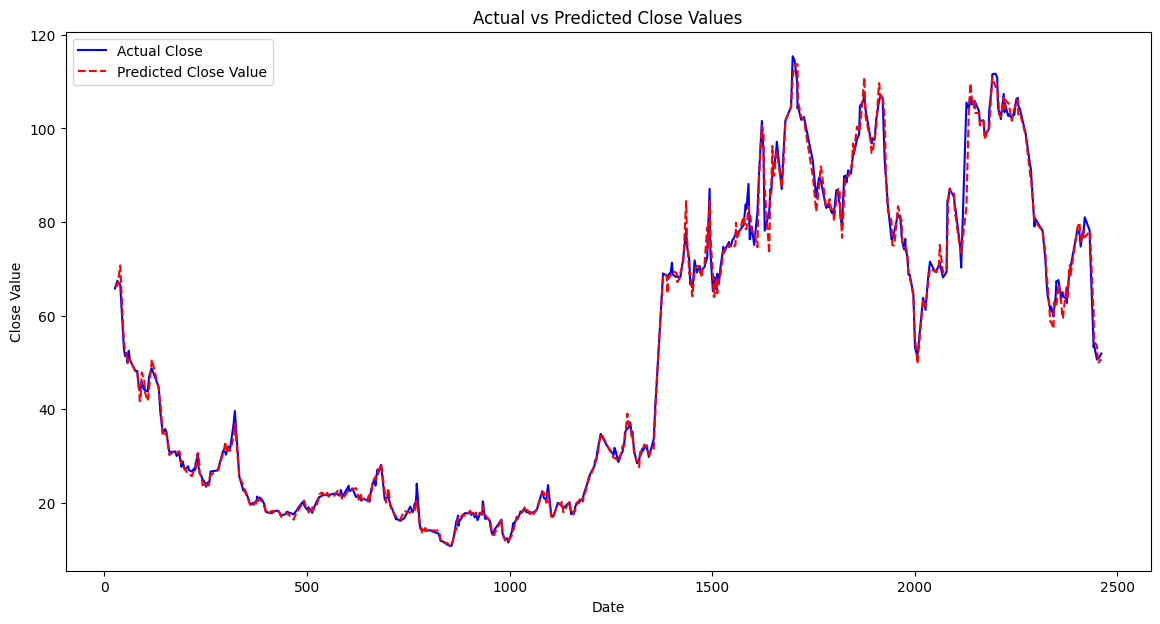

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted.index, valid_sorted['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted.index, valid_sorted['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_cls = RandomForestClassifier(**best_params, random_state=42)
rf_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred = rf_cls.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred)
recall = recall_score(y_test_cls, y_pred)
f1 = f1_score(y_test_cls, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8954248366013072
Precision: 0.7616580310880829
Recall: 0.8909090909090909
F1 Score: 0.8212290502793296


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_new = RandomForestRegressor(n_estimators= 200, max_depth= 3,max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 7,random_state=42)
rf_new.fit(X_train_reg_scaled, y_train_reg)

predictions = rf_new.predict(X_test_reg_scaled)

r2 = r2_score(y_test_reg, predictions)
rmse = mean_squared_error(y_test_reg, predictions, squared=False)
mae = mean_absolute_error(y_test_reg, predictions)
mse = mean_squared_error(y_test_reg, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"Random Forest R^2: {r2}")
print(f"Random Forest RMSE: {rmse}")

MAE: 2.3871601283523645
MSE: 12.415060652162664
Random Forest R^2: 0.9874596408641066
Random Forest RMSE: 3.523501192303284


In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close Value':predictions})
valid

,Actual Close,Predicted Close Value
2222,103.50,103.158705
938,17.38,17.427266
2204,110.80,103.653687
2105,79.95,78.452651
1496,73.40,76.915313
...,...,...
1320,28.95,30.832699
1027,18.10,17.417480
2453,50.60,57.140635
500,18.50,17.424467


In [ ]:
valid_sorted = valid.sort_index()
valid_sorted

,Actual Close,Predicted Close Value
26,65.79,67.857197
32,67.44,67.857197
39,66.54,68.079512
48,52.96,66.653644
51,51.32,61.385627
...,...,...
2442,53.25,67.943714
2443,53.80,67.263495
2450,50.60,60.596583
2453,50.60,57.140635


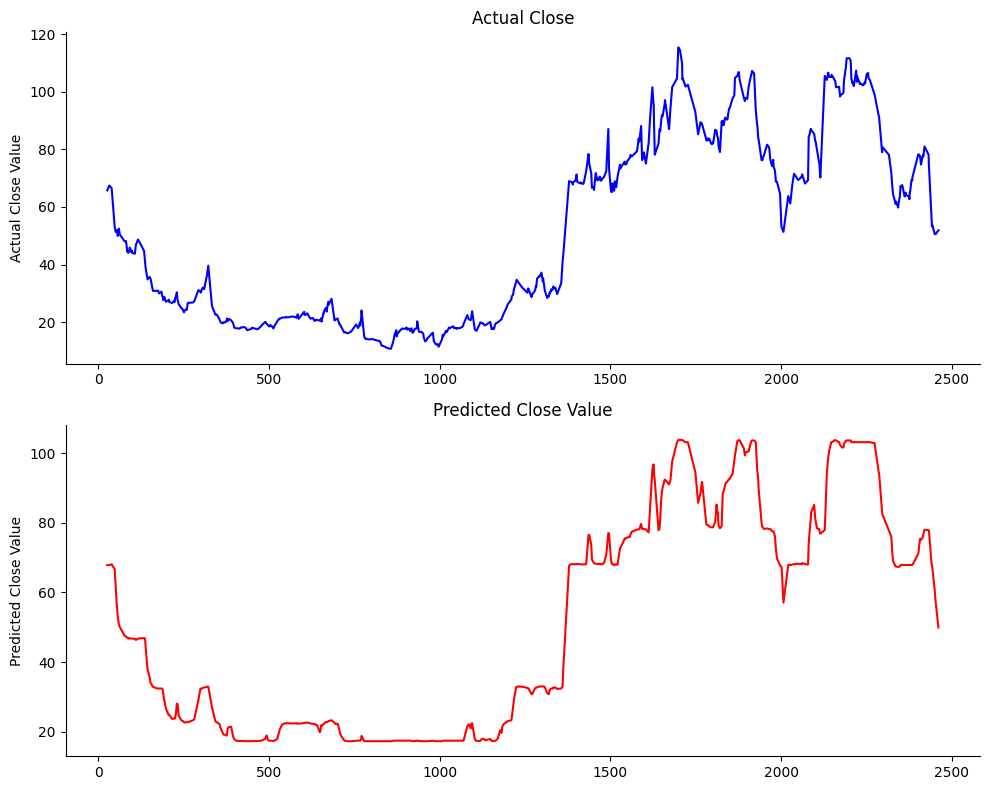

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

valid_sorted['Actual Close'].plot(ax=ax1, kind='line', title='Actual Close', color='blue')
ax1.set_ylabel('Actual Close Value')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

valid_sorted['Predicted Close Value'].plot(ax=ax2, kind='line', title='Predicted Close Value', color='red')
ax2.set_ylabel('Predicted Close Value')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

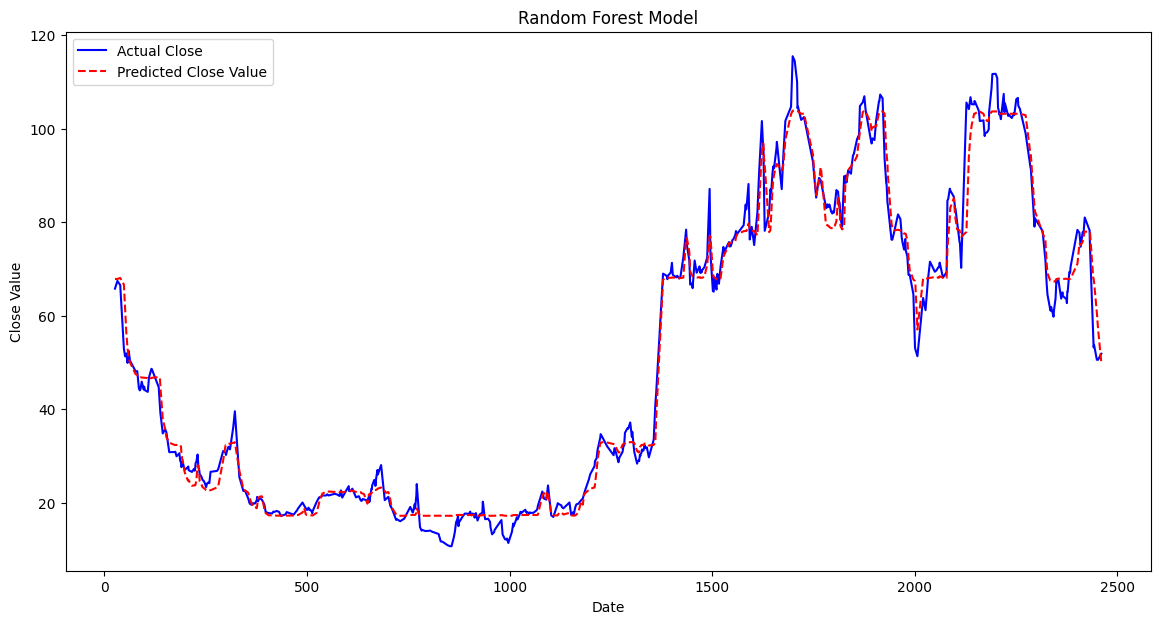

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted.index, valid_sorted['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted.index, valid_sorted['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Random Forest Model')
plt.legend()
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svc_best = SVC(C =100, degree= 2, gamma = 'scale', kernel= 'rbf')
svc_best.fit(X_train_cls_scaled, y_train_cls)

y_pred = svc_best.predict(X_test_cls_scaled)


In [ ]:
accuracy = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred)
recall = recall_score(y_test_cls, y_pred)
f1 = f1_score(y_test_cls, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8790849673202614
Precision: 0.7333333333333333
Recall: 0.8666666666666667
F1 Score: 0.7944444444444444


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
svr_new = SVR(C= 100, epsilon= 0.5, gamma= 'scale', kernel='poly')
svr_new.fit(X_train_reg_scaled, y_train_reg)

predictions = svr_new.predict(X_test_reg_scaled)

r2 = r2_score(y_test_reg, predictions)
rmse = mean_squared_error(y_test_reg, predictions, squared=False)
mae = mean_absolute_error(y_test_reg, predictions)
mse = mean_squared_error(y_test_reg, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"SVR R^2: {r2}")
print(f"SVR RMSE: {rmse}")


MAE: 10.44739106099268
MSE: 197.55082978477907
SVR R^2: 0.8004553966747383
SVR RMSE: 14.055277648797233


In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close Value':predictions})
valid

,Actual Close,Predicted Close Value
2222,103.50,119.534292
938,17.38,23.213879
2204,110.80,122.981073
2105,79.95,60.743004
1496,73.40,48.013344
...,...,...
1320,28.95,27.712379
1027,18.10,13.589278
2453,50.60,40.448456
500,18.50,21.718210


In [ ]:
valid_sorted = valid.sort_index()
valid_sorted

,Actual Close,Predicted Close Value
26,65.79,41.852635
32,67.44,42.085050
39,66.54,42.276815
48,52.96,40.621385
51,51.32,40.121232
...,...,...
2442,53.25,41.967629
2443,53.80,40.669217
2450,50.60,40.248754
2453,50.60,40.448456


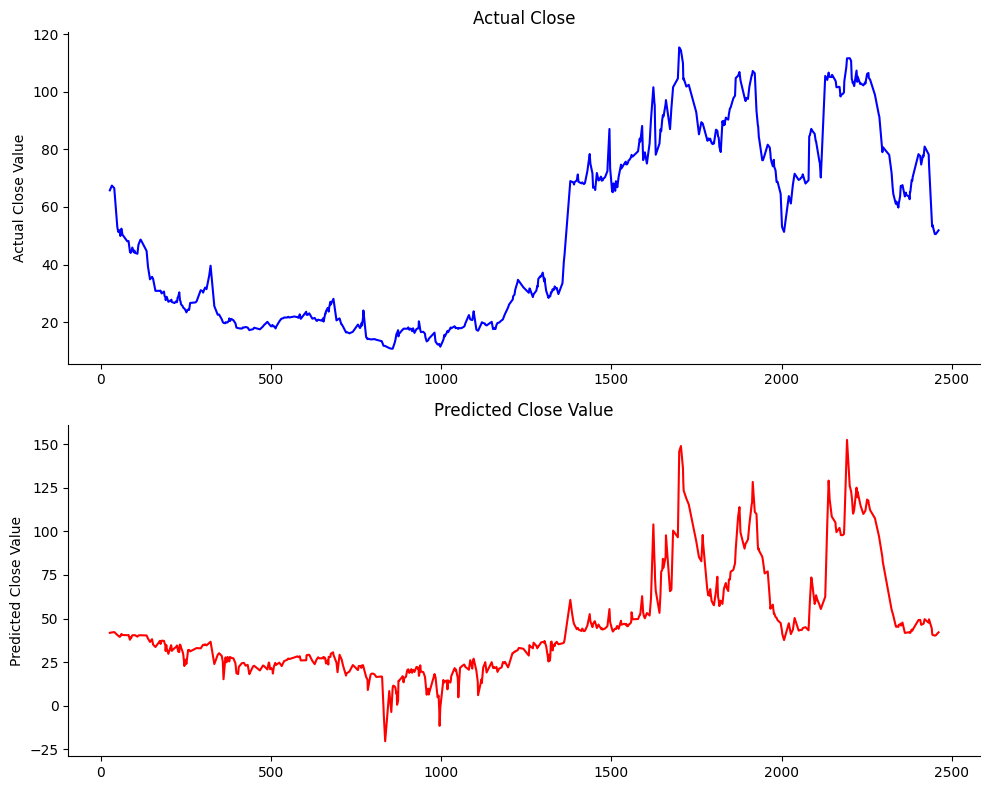

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

valid_sorted['Actual Close'].plot(ax=ax1, kind='line', title='Actual Close', color='blue')
ax1.set_ylabel('Actual Close Value')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

valid_sorted['Predicted Close Value'].plot(ax=ax2, kind='line', title='Predicted Close Value', color='red')
ax2.set_ylabel('Predicted Close Value')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

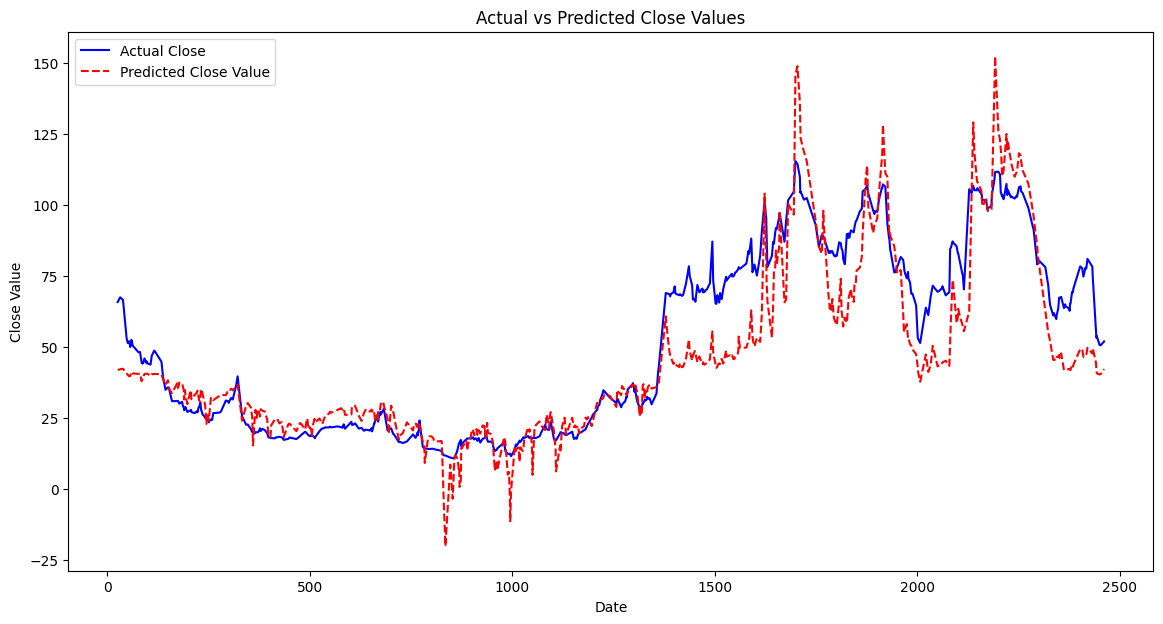

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted.index, valid_sorted['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted.index, valid_sorted['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()

# Echo State Network

In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/ColabNotebooks/research/datasets/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from pyESN import ESN

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [ ]:
esn_data = data

esn_data['Date'] = pd.to_datetime(esn_data['Date'])
esn_data['Year'] = esn_data['Date'].dt.year

esn_data['Month'] = esn_data['Date'].dt.month

esn_data['Day'] = esn_data['Date'].dt.day

In [ ]:
from plotly.subplots import make_subplots

fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=esn_data['Date'],y=esn_data['Close'],name='Price'),secondary_y=False)
fig2.add_trace(go.Bar(x=esn_data['Date'],y=esn_data['Volume'],name='Volume'),secondary_y=True)

max_vol = esn_data['Volume'].max()

fig2.update_yaxes(range=[0,max_vol*4],secondary_y=True)
fig2.update_yaxes(visible=False, secondary_y=True)

fig2.show()

In [ ]:
from pyESN import ESN
from sklearn.metrics import accuracy_score


n_reservoir = 600
sparsity = 0.1
rand_seed = 23
spectral_radius = 1.2
noise = 0.005

esn = ESN(n_inputs=1, n_outputs=1, n_reservoir=n_reservoir,
          sparsity=sparsity, random_state=rand_seed,
          spectral_radius=spectral_radius, noise=noise)

esn.fit(np.ones(len(X_train_cls_scaled)), y_train_cls)
y_pred_cls = esn.predict(np.ones(len(X_test_cls_scaled)))
def convert_to_profit_loss(y_pred):
    return np.where(y_pred <= 0, -1, 1)

y_pred_cls_converted = convert_to_profit_loss(y_pred_cls)



In [ ]:
accuracy = accuracy_score(y_test_cls, y_pred_cls_converted)
precision = precision_score(y_test_cls, y_pred_cls_converted)
recall = recall_score(y_test_cls, y_pred_cls_converted)
f1 = f1_score(y_test_cls, y_pred_cls_converted)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5294117647058824
Precision: 0.2983606557377049
Recall: 0.5515151515151515
F1 Score: 0.3872340425531915


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import make_scorer

class ESNWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_reservoir=500, sparsity=0.2, spectral_radius=1.2, noise=0.01, random_state=None):
        self.esn = ESN(n_inputs=6, n_outputs=1, n_reservoir=n_reservoir,
                       sparsity=sparsity, spectral_radius=spectral_radius,
                       noise=noise, random_state=random_state)

    def fit(self, X, y):
        X_reshaped = np.reshape(X, (X.shape[0], -1))
        self.esn.fit(X_reshaped, y)
        return self

    def predict(self, X):
        X_reshaped = np.reshape(X, (X.shape[0], -1))
        return self.esn.predict(X_reshaped)

    def get_params(self, deep=True):
        return {
            'n_reservoir': self.esn.n_reservoir,
            'sparsity': self.esn.sparsity,
            'spectral_radius': self.esn.spectral_radius,
            'noise': self.esn.noise,
            'random_state': self.esn.random_state
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self.esn, param, value)
        return self


In [ ]:
reg_esn = ESNWrapper(n_reservoir=97,
                      noise=3,
                      sparsity= 0.3, spectral_radius=1.1, random_state=44)

reg_esn.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = reg_esn.predict(X_test_reg_scaled)
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"ESN R^2: {r2}")
print(f"ESN RMSE: {rmse}")

MAE: 6.315885629022061
MSE: 231.4144584945613
ESN R^2: 0.7662500006993878
ESN RMSE: 15.21231272668825


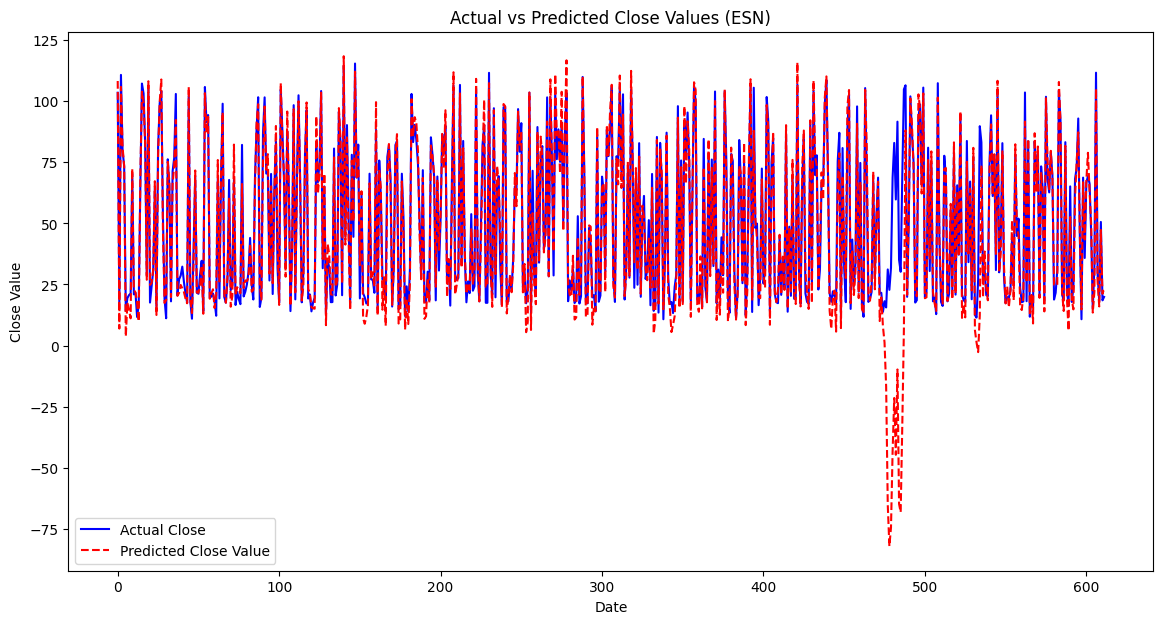

In [ ]:

y_test_reg = np.array(y_test_reg).reshape(-1)
y_pred_reg = np.array(y_pred_reg).reshape(-1)

valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close Value': y_pred_reg})

valid_sorted = valid.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(valid_sorted.index, valid_sorted['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted.index, valid_sorted['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values (ESN)')
plt.legend()
plt.show()
